For this homework, you are a data scientist working for Pronto (before the end of their contract with the City of Seattle). Your job is to assist in determining how to do end-of-day adjustments in the number of bikes at stations so that all stations will have enough bikes for the next day of operation (as estimated by the weekday average for the station for the year). Your assistance will help in constructing a plan for each day of the week that specifies how many bikes should be moved from each station and how many bikes must be delievered to each station.

Your assignment is to construct plots of the differences between 'from' and 'to' counts for each station by day of the week. Do this as a set of 7 subplots. You should use at least one function to construct your plots.

Grading

2-pts: create a dataframe with station counts averages by day-of-week

1-pt: structure the 7 day-of-week plots as subplots

1-pt: label the plots by day-of-week

1-pt: label the x-axis for plots in the last row and label the y-axis for plots in the left-most column

In [149]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np


In [150]:
trips = pd.read_csv('2015_trip_data.csv',
                    parse_dates=['starttime', 'stoptime'],
                    infer_datetime_format=True)
trips.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,2014-10-13 10:31:00,2014-10-13 10:48:00,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1960.0
1,432,2014-10-13 10:32:00,2014-10-13 10:48:00,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1970.0
2,433,2014-10-13 10:33:00,2014-10-13 10:48:00,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1988.0
3,434,2014-10-13 10:34:00,2014-10-13 10:48:00,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1977.0
4,435,2014-10-13 10:34:00,2014-10-13 10:49:00,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1971.0


In [167]:
time=trips['starttime']=pd.to_datetime(trips['starttime'])
trips['stoptime']=pd.to_datetime(trips['stoptime'])


trips['dayofweek'] = trips['starttime'].dt.dayofweek


In [168]:
df = pd.DataFrame({'start' : pd.to_datetime(trips['starttime'][0]),
                   'end' : pd.to_datetime(trips['starttime'][len(trips) - 1])}, index = [0])

(df['end']-df['start']).apply(lambda x: x/np.timedelta64(1,'W'))


0    52.072817
dtype: float64

In [191]:
names=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
fromlist=[]
for i in range(0,7):
    subset = trips[trips.dayofweek == i]
    from_station_counts = pd.value_counts(subset['from_station_id'])
    from_station_mean = pd.DataFrame({name[i]: from_station_counts/52})
    from_station_mean = round(from_station_mean,2)
    fromlist.append(from_station_mean)
    
df_from = pd.concat(fromlist, axis=1)  
df_from.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
BT-01,15.50,13.92,13.06,15.40,17.71,22.08,15.50
BT-03,11.10,11.42,11.92,11.65,12.63,11.48,10.54
BT-04,7.44,6.75,6.58,7.12,6.60,4.27,3.96
BT-05,9.62,9.44,8.88,9.54,9.92,9.71,7.65
CBD-03,8.98,8.71,8.52,9.15,8.94,5.94,6.94


In [192]:
mean_list=[]
for i in range(0,7):
    subset = trips[trips.dayofweek == i]
    from_station_counts = pd.value_counts(subset['from_station_id'])
    to_station_counts = pd.value_counts(subset['to_station_id'])
    station_mean_diff = pd.DataFrame({name[i]: from_station_counts/52-to_station_counts/52})
    station_mean_diff = round(station_mean_diff,4)
    mean_list.append(station_mean_diff)
    
df_diff_mean= pd.concat(mean_list, axis=1)  
df_diff_mean.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
BT-01,0.3462,1.0000,-0.3462,0.1731,1.3654,0.0000,-0.9038
BT-03,0.8462,1.5192,1.8654,3.0192,3.5962,3.2115,1.5769
BT-04,1.1346,1.1346,0.8269,1.6154,1.2115,0.3654,0.7308
BT-05,-0.2115,-0.1346,-0.5000,-1.0577,0.2692,-0.0192,-0.0962
CBD-03,-2.9231,-2.7885,-3.4231,-2.5000,-3.3462,-2.6346,-1.3269


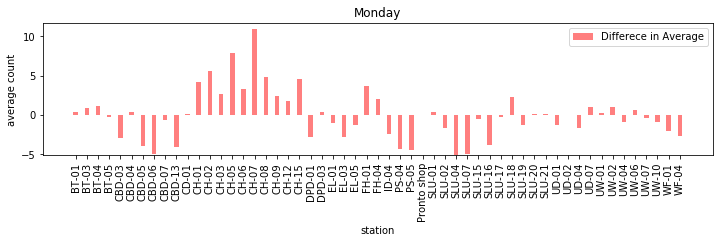

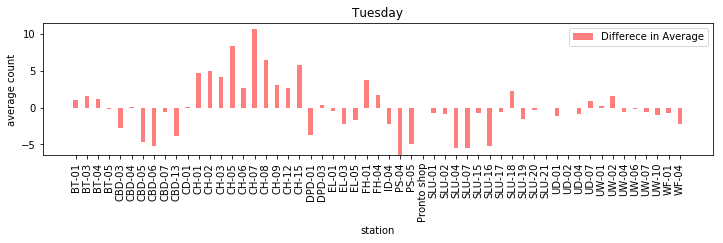

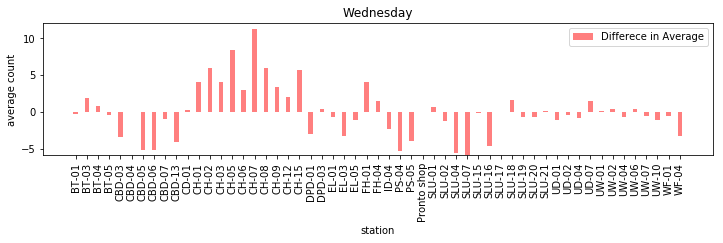

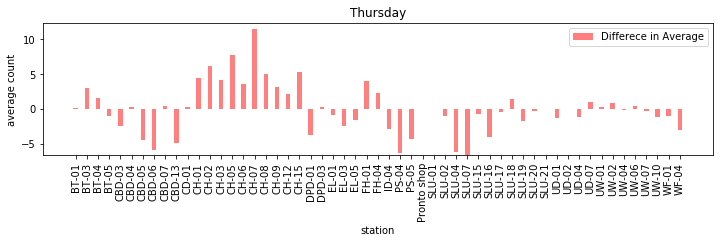

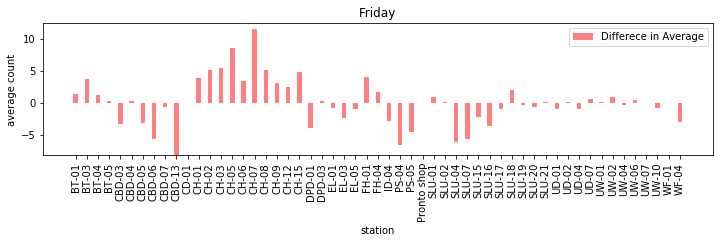

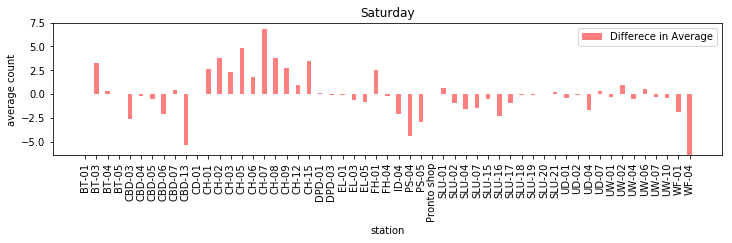

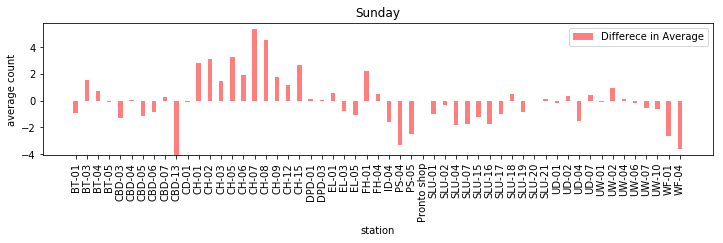

In [202]:
def plot_diff(df_diff_mean,names):
    bar_width=0.4 
    opacity=0.5 
    len_names=len(names)
    len_df_diff_mean=len(df_diff_mean.index)
    index=np.arange(len_df_diff_mean)
    
    for name in names: 
        i=++1 
        fig=plt.figure(figsize=(12,20))
        plt.subplot(len_names,1,i)
        rects1=plt.bar(index,df_diff_mean[name],bar_width,alpha=opacity,color='r',label='Differece in Average')
        plt.xticks(index, df_from.index)
        _, labels = plt.xticks()
        plt.setp(labels, rotation=90)
        plt.xlabel('station')
        plt.ylabel('average count')
        plt.title(name)
        plt.legend()
        plt.show()
    
plot_diff(df_diff_mean,names)